# Quiz 03
## Background: Evaluating Current Extreme Snowfall in the Sierras

The snowpack in the Sierra Nevada mountains has reached record-breaking levels as a result of a series of atmospheric river events. 


<figure>
<img src="img/daniel-swain-tweet.png" width="400"/>
</figure>

<figure>
<img src="img/march-12-2023-snowpack.jpeg" width="400"/>
</figure>


Over the past few weeks you have been building up your skills in geospatial analysis. We can now use those skills to see for ourselves this historic event and try to quantify the magntiude relative to other years.

For this quiz you will be calculating the Normalized Difference Snow Index (NDSI) using Sentinel-2 data. The NDSI is an index that is related to the presence of snow in a pixel and is a more accurate description of snow detection as compared to Fractional Snow Cover (FSC). Snow typically has very high visible (VIS) reflectance and very low reflectance in the shortwave infrared (SWIR), a characteristic used to detect snow by distinguishing between snow and most cloud types. 


The NDSI is calculated as follows:

(Green - SWIR) / (Green + SWIR)




Where values above 0.42 indicate snow. Recall the Sentinel-2 bands are as follows:

<figure>
<img src="img/sentinel-2-bands.jpg" width="400"/>
</figure>



Answer the following questions to perform a snow area comparison for the past few years in the Tuolumne watershed (```data/tuolumne-watershed.geojson```) ([source](https://geodata.lib.berkeley.edu/catalog/stanford-yt364hw9952)).




## Questions

To give you an idea of the type of results you should see, review the RGB + NDSI applied masks below:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns
import rioxarray as rxr
import xarray as xr
import geopandas as gpd
from PIL import Image


(-0.5, 1371.5, 709.5, -0.5)

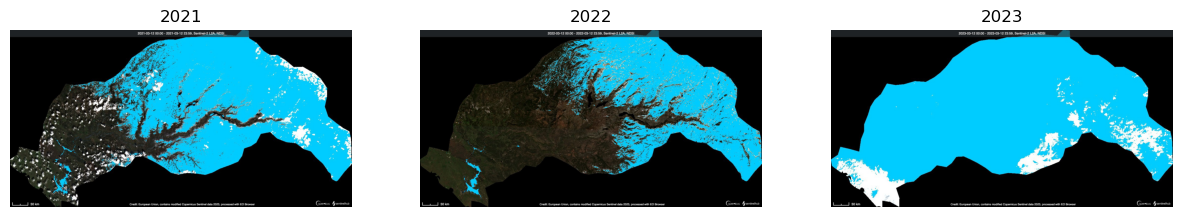

In [2]:
f, axs = plt.subplots(1,3, figsize=(15, 15))

axs[0].imshow(np.asarray(Image.open('img/2021-03-12-00_00_2021-03-12-23_59_Sentinel-2_L2A_NDSI.jpg')))
axs[0].title.set_text('2021')
axs[0].axis('off')
axs[1].imshow(np.asarray(Image.open('img/2022-03-12-00_00_2022-03-12-23_59_Sentinel-2_L2A_NDSI.jpg')))
axs[1].title.set_text('2022')
axs[1].axis('off')
axs[2].imshow(np.asarray(Image.open('img/2023-03-12-00_00_2023-03-12-23_59_Sentinel-2_L2A_NDSI.jpg')))
axs[2].title.set_text('2023')
axs[2].axis('off')




1. Load and mask the correct Sentinel-2 bands (hint, as there are many SWIR bands use band 11) to calculate NDSI for March 12th, 2021, 2022 and 2023. All files are located under the ```data``` folder. 

In [3]:
#Load and mask green bands from all 3 years 
greenBand2021 = rxr.open_rasterio('data/2021-03-12/2021-03-12-00:00_2021-03-12-23:59_Sentinel-2_L2A_B03_(Raw).tiff', masked=True)
greenBand2022 = rxr.open_rasterio('data/2022-03-12/2022-03-12-00:00_2022-03-12-23:59_Sentinel-2_L2A_B03_(Raw).tiff', masked=True)
greenBand2023 = rxr.open_rasterio('data/2023-03-12/2023-03-12-00:00_2023-03-12-23:59_Sentinel-2_L2A_B03_(Raw).tiff', masked=True)

#Load and mask SWIR bands from all 3 years
SWIRBand2021 = rxr.open_rasterio('data/2021-03-12/2021-03-12-00:00_2021-03-12-23:59_Sentinel-2_L2A_B11_(Raw).tiff', masked=True)
SWIRBand2022 = rxr.open_rasterio('data/2022-03-12/2022-03-12-00:00_2022-03-12-23:59_Sentinel-2_L2A_B11_(Raw).tiff', masked=True)
SWIRBand2023 = rxr.open_rasterio('data/2023-03-12/2023-03-12-00:00_2023-03-12-23:59_Sentinel-2_L2A_B03_(Raw).tiff', masked=True)

2. Calculate NDSI for each year and save as intermediate outputs. 

In [7]:
#Calculate the NDSI for each year
NDSI2021 = (greenBand2021 - SWIRBand2021)/(greenBand2021 + SWIRBand2021)
NDSI2022 = (greenBand2022 - SWIRBand2022)/(greenBand2022 + SWIRBand2022)
NDSI2023 = (greenBand2023 - SWIRBand2023)/(greenBand2023 + SWIRBand2023)

#Save the NDSI as a file in the week 9 quiz data folder for each year
NDSI2021.rio.to_raster('data/NDSI2021.tiff')
NDSI2022.rio.to_raster('data/NDSI2022.tiff')
NDSI2023.rio.to_raster('data/NDSI2023.tiff')

3. Show that the spatial extent, CRS and resolution is the same for all three years. 

In [14]:
print('The spatial extents of the data sets in order of year are:')
print(NDSI2021.rio.bounds())
print(NDSI2022.rio.bounds())
print(NDSI2023.rio.bounds())
print('\nThe resoltions of the data sets in order of year are:')
print(NDSI2021.rio.resolution())
print(NDSI2022.rio.resolution())
print(NDSI2023.rio.resolution())
print('\nThe crs of the data sets in order of year are:')
print(NDSI2021.rio.crs)
print(NDSI2022.rio.crs)
print(NDSI2023.rio.crs)

The spatial extents of the data sets in order of year are:
(-13424905.301283326, 4531047.032942325, -13270015.012250366, 4611213.142305653)
(-120.5979762, 37.65673645, -119.20657306000001, 38.22467138)
(-13424905.301283326, 4531047.032942325, -13270015.012250366, 4611213.142305653)

The resoltions of the data sets in order of year are:
(247.82446245273948, -248.19228905055027)
(0.0022262450240000133, -0.0017583124767801852)
(247.82446245273948, -248.19228905055027)

The crs of the data sets in order of year are:
EPSG:3857
EPSG:4326
EPSG:3857


The NDSI 2022 data set is in a different crs so reproject the data to match the NDSI of 2021 and 2023.

In [22]:
#Reproject the 2022 data to the epsg of the other two data sets and print it to check
NDSI2022Reprojected = NDSI2022.rio.reproject(3857)
NDSI2022Reprojected.rio.crs

CRS.from_epsg(3857)

In [25]:
print(NDSI2022Reprojected.rio.bounds())
print(NDSI2022Reprojected.rio.resolution())

(-13424905.301283326, 4531140.783299239, -13269966.526116114, 4611213.142305654)
(247.90204026753534, -247.90204026753534)


The new spatial extent and resolution of the 2022 data set are very similar to the 2021 and 2023 data set.

4. Reclassify each NDSI year as follows:
- < 0.42: no snow
- $\gt$ 0.42: snow

In [26]:
breaks = [-np.inf, 0.42, np.inf]

NDSI2021Reclass = xr.apply_ufunc(np.digitize,
                                     NDSI2021,
                                     breaks)
NDSI2022Reclass = xr.apply_ufunc(np.digitize,
                                     NDSI2022Reprojected,
                                     breaks)
NDSI2023Reclass = xr.apply_ufunc(np.digitize,
                                     NDSI2023,
                                     breaks)


5. Create three subplots in one figure (1 row with 3 columns) depicting your classified snow data using: ```colors = ['grey', 'cyan', 'black']```. Write 1-2 sentences of patterns you observe.

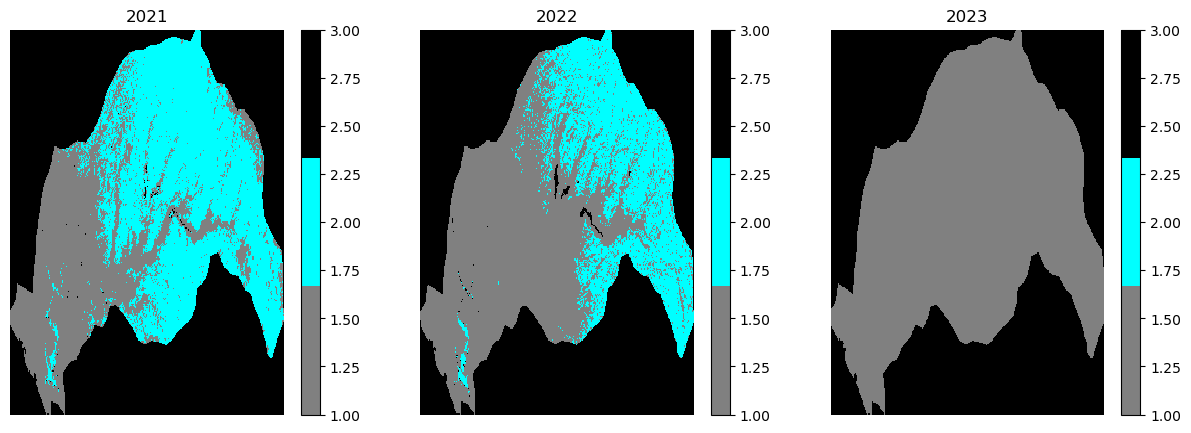

In [39]:
#Set the color and class bin parameters
colors = ['grey', 'cyan', 'black']
cmap = ListedColormap(colors)

#Plot data
f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 5))
NDSI2021Reclass.plot(cmap=cmap ,ax=ax1)
NDSI2022Reclass.plot(cmap=cmap,ax=ax2)
NDSI2023Reclass.plot(cmap=cmap,ax=ax3)
ax1.set(title="2021")
ax1.set_axis_off()
ax2.set(title="2022")
ax2.set_axis_off()
ax3.set(title="2023")
ax3.set_axis_off()
plt.show()

From 2021 to 2023 the amount of space covered by grey in the image has increased greately and the amount covered by cyan has decreased greatly. I assume that this shows a large increase in snow cover for 2023 due to large amounts of precipitation. 

6. Create three subplots in one figure (1 row with 3 columns) depicting histograms of your classified snow data.

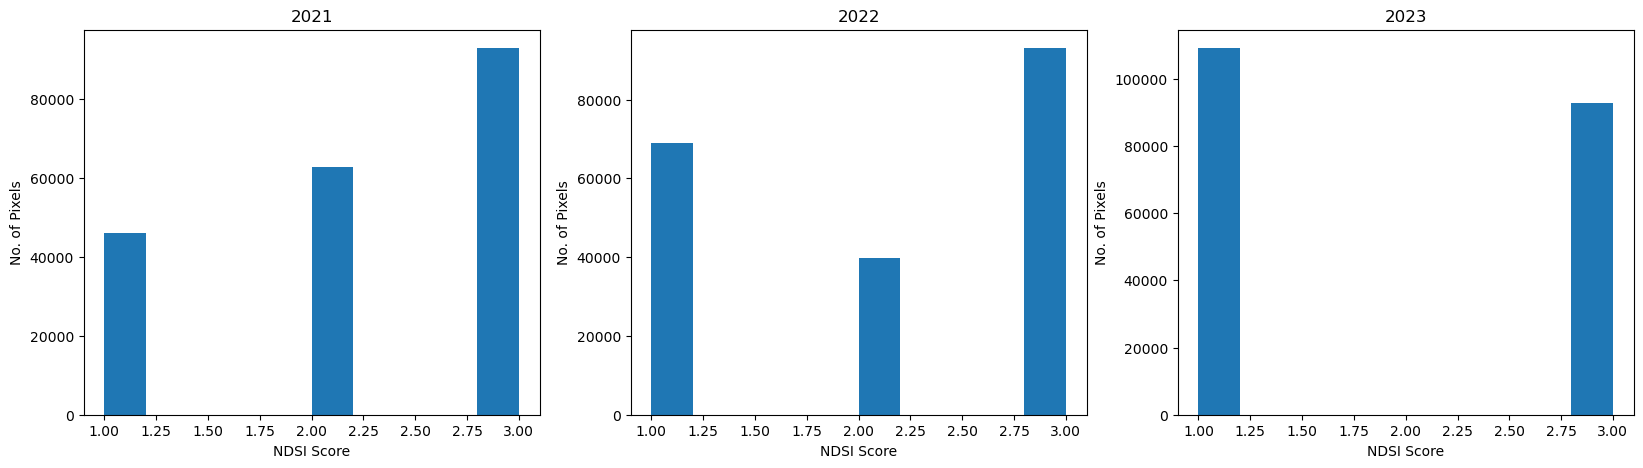

In [42]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20, 5))
NDSI2021Reclass.plot.hist(ax=ax1)
NDSI2022Reclass.plot.hist(ax=ax2)
NDSI2023Reclass.plot.hist(ax=ax3)
ax1.set(title="2021",
       xlabel="NDSI Score",
       ylabel="No. of Pixels")
ax2.set(title="2022",
       xlabel="NDSI Score",
       ylabel="No. of Pixels")
ax3.set(title="2023",
       xlabel="NDSI Score",
       ylabel="No. of Pixels")
plt.show()

7. Given that the CRS is a projected coordinate reference system in meters, use the pixel resolution and information from your histograms to estimate the **total area of snow** (i.e. number of pixels in each bin * pixel area) for each year.

Estimate the total snow area by multiplying the number of gray pixels by the approximate resolution area given in problem 3.

In [44]:
print('Snow area in 2021 is', 45000*247.8**2, 'm^2')
print('Snow area in 2022 is', 68000*247.8**2, 'm^2')
print('Snow area in 2023 is', 110000*247.8**2, 'm^2')

Snow area in 2021 is 2763217800.0 m^2
Snow area in 2022 is 4175529120.0000005 m^2
Snow area in 2023 is 6754532400.0 m^2
